In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("base_version5112.csv")

In [4]:
df.head()

Unnamed: 0                 time  gen..kW.  House.overall..kW.  \
0           0  2016-01-01 00:58:00  0.003417            0.714200   
1           1  2016-01-01 00:59:00  0.003417            0.497067   
2           2  2016-01-01 01:00:00  0.003450            0.465133   
3           3  2016-01-01 01:01:00  0.003417            0.512933   
4           4  2016-01-01 01:02:00  0.003417            0.651283   

   Dishwasher..kW.  Furnace.1..kW.  Furnace.2..kW.  Home.office..kW.  \
0         0.000033        0.021083        0.309983          0.043067   
1         0.000017        0.096983        0.062867          0.043283   
2         0.000017        0.064500        0.062633          0.043250   
3         0.000017        0.111333        0.063883          0.043300   
4         0.000017        0.114583        0.063200          0.043283   

   Fridge..kW.  Wine.cellar..kW.  ...  visibility  summary  \
0     0.005167          0.123317  ...        10.0   Cloudy   
1     0.005000          0.123283  ...        10.0   Cloudy   
2     0.005017          0.123350  ...        10.0   Cloudy   
3     0.004967          0.123867  ...        10.0   Cloudy   
4     0.114167          0.124267  ...        10.0   Cloudy   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                -1.44   1016.25       8.29        0.75          285   
1                -1.44   1016.25       8.29        0.75          285   
2                -1.44   1016.25       8.29        0.75          285   
3                -1.44   1016.25       8.29        0.75          285   
4                -1.44   1016.25       8.29        0.75          285   

   precipIntensity  dewPoint precipProbability  
0              0.0      -4.5               0.0  
1              0.0      -4.5               0.0  
2              0.0      -4.5               0.0  
3              0.0      -4.5               0.0  
4              0.0      -4.5               0.0  

[5 rows x 31 columns]

In [5]:
df.columns

Index(['Unnamed: 0', 'time', 'gen..kW.', 'House.overall..kW.',
       'Dishwasher..kW.', 'Furnace.1..kW.', 'Furnace.2..kW.',
       'Home.office..kW.', 'Fridge..kW.', 'Wine.cellar..kW.',
       'Garage.door..kW.', 'Kitchen.12..kW.', 'Kitchen.14..kW.',
       'Kitchen.38..kW.', 'Barn..kW.', 'Well..kW.', 'Microwave..kW.',
       'Living.room..kW.', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

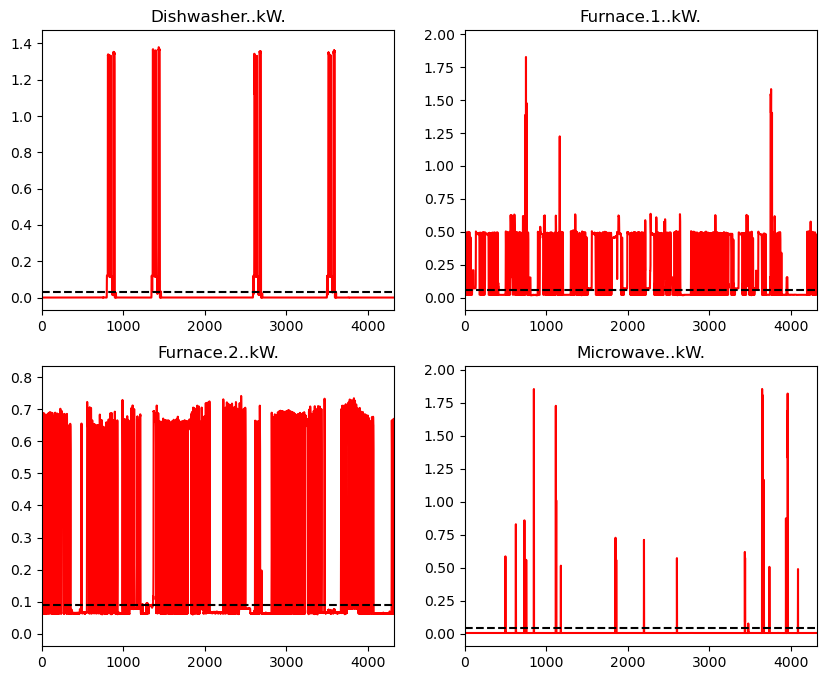

In [110]:
umbrals = ["Dishwasher..kW.","Furnace.1..kW.","Furnace.2..kW.","Microwave..kW."]
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,8))
plots = dict(zip(umbrals,[ax0,ax1,ax2,ax3]))
alturas = dict(zip(umbrals, [0.03,0.06,0.09,0.04]))
for u,p in plots.items():
    p.plot(df[u], color="red")
    p.axhline(alturas[u], color='black', linestyle='--')
    p.set_title(u)
    p.set_xlim([0,24*60*3])
plt.savefig("thresholds.png", bbox_inches='tight')
plt.show()

In [100]:
alturas

{'Dishwasher..kW.': 0.03,
 'Furnace.1..kW.': 0.06,
 'Furnace.2..kW.': 0.09,
 'Microwave..kW.': 0.04}

In [102]:
for m,u in alturas.items():
    df[m+"ON"] = (df[m] > u).astype(int)
df

Unnamed: 0                 time  gen..kW.  House.overall..kW.  \
0                0  2016-01-01 00:58:00  0.003417            0.714200   
1                1  2016-01-01 00:59:00  0.003417            0.497067   
2                2  2016-01-01 01:00:00  0.003450            0.465133   
3                3  2016-01-01 01:01:00  0.003417            0.512933   
4                4  2016-01-01 01:02:00  0.003417            0.651283   
...            ...                  ...       ...                 ...   
503847      503847  2016-12-15 22:25:00  0.003183            1.601233   
503848      503848  2016-12-15 22:26:00  0.003233            1.599333   
503849      503849  2016-12-15 22:27:00  0.003217            1.924267   
503850      503850  2016-12-15 22:28:00  0.003217            1.978200   
503851      503851  2016-12-15 22:29:00  0.003233            1.990950   

        Dishwasher..kW.  Furnace.1..kW.  Furnace.2..kW.  Home.office..kW.  \
0              0.000033        0.021083        0.309983          0.043067   
1              0.000017        0.096983        0.062867          0.043283   
2              0.000017        0.064500        0.062633          0.043250   
3              0.000017        0.111333        0.063883          0.043300   
4              0.000017        0.114583        0.063200          0.043283   
...                 ...             ...             ...               ...   
503847         0.000050        0.085267        0.642417          0.041783   
503848         0.000050        0.104017        0.625033          0.041750   
503849         0.000033        0.422383        0.637733          0.042033   
503850         0.000050        0.495667        0.620367          0.042100   
503851         0.000050        0.494700        0.634133          0.042100   

        Fridge..kW.  Wine.cellar..kW.  ...  windSpeed  cloudCover  \
0          0.005167          0.123317  ...       8.29        0.75   
1          0.005000          0.123283  ...       8.29        0.75   
2          0.005017          0.123350  ...       8.29        0.75   
3          0.004967          0.123867  ...       8.29        0.75   
4          0.114167          0.124267  ...       8.29        0.75   
...             ...               ...  ...        ...         ...   
503847     0.005267          0.008667  ...       6.72        0.31   
503848     0.005233          0.008433  ...       6.72        0.31   
503849     0.004983          0.008467  ...       6.72        0.31   
503850     0.005333          0.008233  ...       6.72        0.31   
503851     0.004917          0.008133  ...       6.72        0.31   

        windBearing  precipIntensity  dewPoint  precipProbability  \
0               285           0.0000     -4.50               0.00   
1               285           0.0000     -4.50               0.00   
2               285           0.0000     -4.50               0.00   
3               285           0.0000     -4.50               0.00   
4               285           0.0000     -4.50               0.00   
...             ...              ...       ...                ...   
503847          186           0.0101     -0.41               0.51   
503848          186           0.0101     -0.41               0.51   
503849          186           0.0101     -0.41               0.51   
503850          186           0.0101     -0.41               0.51   
503851          186           0.0101     -0.41               0.51   

        Dishwasher..kW.ON  Furnace.1..kW.ON  Furnace.2..kW.ON Microwave..kW.ON  
0                       0                 0                 1                0  
1                       0                 1                 0                0  
2                       0                 1                 0                0  
3                       0                 1                 0                0  
4                       0                 1                 0                0  
...                   ...               ...               ... 

In [103]:
for u in umbrals:
    print(df[u+"ON"].value_counts())
    print()

Dishwasher..kW.ON
0    478894
1     24958
Name: count, dtype: int64

Furnace.1..kW.ON
0    350522
1    153330
Name: count, dtype: int64

Furnace.2..kW.ON
0    390984
1    112868
Name: count, dtype: int64

Microwave..kW.ON
0    499577
1      4275
Name: count, dtype: int64



In [104]:
df.to_csv("base_dummie.csv")